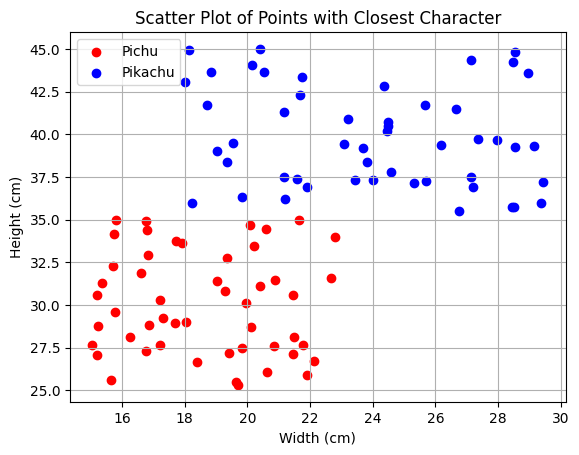

In [191]:
import matplotlib.pyplot as plt

import math
import numpy as np
pichu_text = "../data/pichu(1).txt"
pichu_x = []
pichu_y = []
with open(pichu_text, "r") as file:
    next(file)
    for line in file:
        values = line.strip("()\n").split(",")
        x = float(values[0])
        y = float(values[1])
        pichu_x.append(x)
        pichu_y.append(y)
        
        



pikachu_text = "../data/pikachu.txt"
pikachu_x = []
pikachu_y = []
with open(pikachu_text, "r") as file:
    next(file)
    for line in file:
        values = line.strip("()\n").split(",")
        x = float(values[0])
        y = float(values[1])
        pikachu_x.append(x)
        pikachu_y.append(y)




# Function for calculating the distance
def distance(x, y):
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) ** 0.5

# Function for calculating closest to the given value
def closest_character(points, pichu_points, pikachu_points):
    min_distance_pichu = min(distance(points, (x, y)) for x, y in zip(pichu_points[0], pichu_points[1]))
    min_distance_pikachu = min(distance(points, (x, y)) for x, y in zip(pikachu_points[0], pikachu_points[1]))
    
    if min_distance_pichu < min_distance_pikachu:
        return "Pichu"
    else:
        return "Pikachu"






    
        







plt.scatter(pichu_x, pichu_y, color="red", label="Pichu")
plt.scatter(pikachu_x, pikachu_y, color="blue", label="Pikachu")
plt.title("Scatter Plot of Points with Closest Character")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.grid(True)
plt.show()
       








Sample with (width, height): (25.0, 35.0) classified as Pikachu
Sample with (width, height): (15.0, 14.0) classified as Pichu
Sample with (width, height): (26.0, 30.0) classified as Pichu
Sample with (width, height): (22.0, 45.0) classified as Pikachu


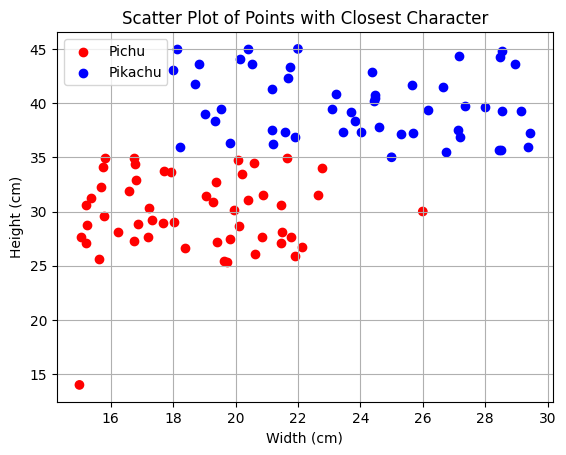

In [194]:

test_points = "../data/test_points.txt"

def distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

test_point_x = []
test_point_y = []
points = []

test_points = "../data/test_points.txt"

# Läs in data från filen och ändra formatet
with open(test_points, "r") as file:
    data = file.read().replace(") ", ")\n")

# Skriv tillbaka den ändrade datan till samma fil
with open(test_points, "w") as file:
    file.write(data)
    
with open(test_points, "r") as test_point:
    for line in test_point:
        # Dela strängen vid kommatecken och rensa bort parenteser och mellanslag
        point_values = line.strip().replace("(", "").replace(")", "").split(",")
        
        # Rensa bort extra tecken från varje sträng och konvertera sedan till float
        point_values = [value.strip()[:-1] if value.endswith(')') else value.strip() for value in point_values]
        
        # Konvertera varje nummer till float och lägg till x- och y-värden i respektive listor
        for i in range(0, len(point_values), 2):
            test_point_x.append(float(point_values[i]))
            test_point_y.append(float(point_values[i+1]))
        try:
        
            points.append((test_point_x, test_point_y))
        
        except ValueError:
            print("Felaktig inmatning. Försök igen eller avsluta med 'q'.")

def closest_character(point, pichu_x, pichu_y, pikachu_x, pikachu_y):
    x, y = point  # Unpack the point tuple
    min_distance_pichu = min(distance((x, y), (px, py)) for px, py in zip(pichu_x, pichu_y))
    min_distance_pikachu = min(distance((x, y), (px, py)) for px, py in zip(pikachu_x, pikachu_y))
    
    if min_distance_pichu < min_distance_pikachu:
        return "Pichu"
    else:
        return "Pikachu"

    
character_list = []
for point_x, point_y in zip(test_point_x, test_point_y):
    character = closest_character((point_x, point_y), pichu_x, pichu_y, pikachu_x, pikachu_y)
    character_list.append(character)
    print(f"Sample with (width, height): ({point_x}, {point_y}) classified as {character}")



color_list = ['red' if character == 'Pichu' else 'blue' for character in character_list]

plt.scatter([point[0] for point in points], [point[1] for point in points], color=color_list, marker='o')
plt.scatter(pichu_x, pichu_y, color="red", label="Pichu")
plt.scatter(pikachu_x, pikachu_y, color="blue", label="Pikachu")

plt.title("Scatter Plot of Points with Closest Character")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.grid(True)
plt.show()
